In [1]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

NOTEBOOK_DIR = Path.cwd()
ROOT_DIR = NOTEBOOK_DIR.parent.parent

sys.path.append(str(ROOT_DIR))
print("Ruta añadida al sys.path:", ROOT_DIR)

Ruta añadida al sys.path: c:\Users\aleja\Documents\Alejandro Duran Carpeta\Proyectos Data Science\Prueba Técnica Similares


In [3]:
# Obtener la ruta de los datos
from src.data.load_data import load_data, codificar_variables
from src.features.balanceo import preprocess_data, split_data
from src.models.train_models import entrenar_modelos, entrenar_final, entrenar_xgboost_final, entrenar_catboost_final
from src.models.evaluate_model import evaluar_modelo, plot_roc_curve
from src.config import DATA_PATH_BANK

In [4]:
DATA_PATH_ = ROOT_DIR / DATA_PATH_BANK
df = load_data(DATA_PATH_)

# Estructura 
print("🔍 Dimensiones:", df.shape)
print("\n🧱 Tipos de datos:\n", df.dtypes)

# Primeras filas
print("\n👀 Primeras filas:")
display(df.head())

# Revisión de nulos
print("\n🚨 Nulos por columna:\n", df.isnull().sum())

# Duplicados
print("\n📎 Registros duplicados:", df.duplicated().sum())

🔍 Dimensiones: (4521, 17)

🧱 Tipos de datos:
 age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

👀 Primeras filas:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no



🚨 Nulos por columna:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

📎 Registros duplicados: 0


In [5]:
# Valores únicos por columna
print("\n🔢 Valores únicos por columna:")
for col in df.columns:
    print(f"- {col}: {df[col].nunique()} valores únicos")


🔢 Valores únicos por columna:
- age: 67 valores únicos
- job: 12 valores únicos
- marital: 3 valores únicos
- education: 4 valores únicos
- default: 2 valores únicos
- balance: 2353 valores únicos
- housing: 2 valores únicos
- loan: 2 valores únicos
- contact: 3 valores únicos
- day: 31 valores únicos
- month: 12 valores únicos
- duration: 875 valores únicos
- campaign: 32 valores únicos
- pdays: 292 valores únicos
- previous: 24 valores únicos
- poutcome: 4 valores únicos
- y: 2 valores únicos


In [6]:
num_cols = df.select_dtypes(include="number").columns

print("\n📊 Estadísticas de variables numéricas:")
display(df[num_cols].describe().T)



📊 Estadísticas de variables numéricas:


,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


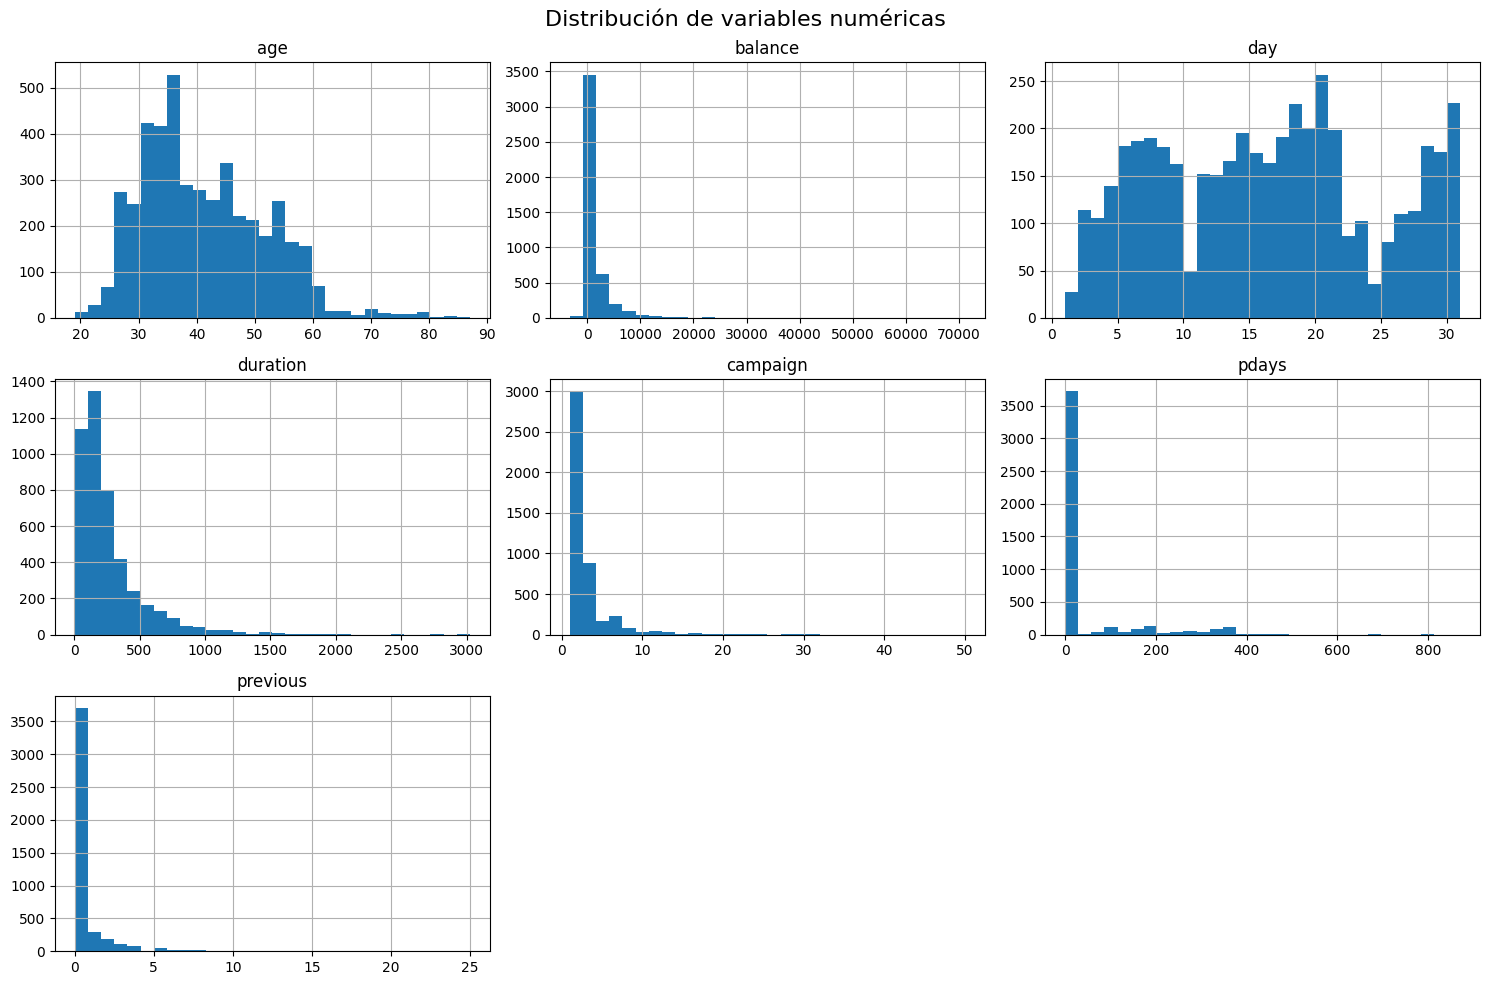

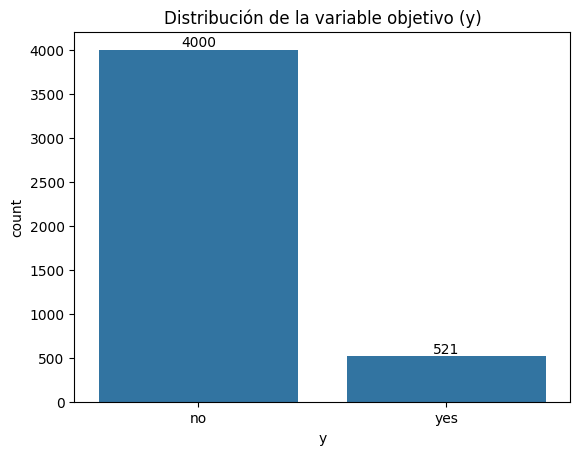

In [7]:
# Histograma de numéricas
df[num_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribución de variables numéricas", fontsize=16)
plt.tight_layout()
plt.show()

# Conteo de la variable objetivo
ax = sns.countplot(data=df, x='y')
plt.title("Distribución de la variable objetivo (y)")
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}',                # El texto que se muestra
                (p.get_x() + p.get_width() / 2., count),  # Posición (centro de la barra, altura)
                ha='center', va='bottom',   # Alineación horizontal y vertical
                fontsize=10, color='black')

plt.show()


In [8]:
# Detectar columnas categóricas
cat_cols = df.select_dtypes(include="object").columns

# Mostrar el conteo absoluto y relativo por cada categoría
for col in cat_cols:
    print(f"\n📌 {col.upper()} - {df[col].nunique()} categorías únicas")
    print("Conteo absoluto:")
    print(df[col].value_counts())
    print("\nPorcentaje relativo (%):")
    print((df[col].value_counts(normalize=True) * 100).round(2))



📌 JOB - 12 categorías únicas
Conteo absoluto:
job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64

Porcentaje relativo (%):
job
management       21.43
blue-collar      20.92
technician       16.99
admin.           10.57
services          9.22
retired           5.09
self-employed     4.05
entrepreneur      3.72
unemployed        2.83
housemaid         2.48
student           1.86
unknown           0.84
Name: proportion, dtype: float64

📌 MARITAL - 3 categorías únicas
Conteo absoluto:
marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64

Porcentaje relativo (%):
marital
married     61.87
single      26.45
divorced    11.68
Name: proportion, dtype: float64

📌 EDUCATION - 4 categorías únicas
Conteo absoluto:
education
secondary    2

In [9]:
df_encoded = codificar_variables(df)
#df_encoded.drop(columns=['duration', 'pdays'], inplace=True)

#df_encoded.drop(columns=['contact_unknown', 'duration', 'pdays', 'contact_telephone', 'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'previous'], inplace=True)

In [10]:
df_encoded.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'contact_telephone',
       'contact_unknown', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [12]:
# 1. Split con 30% para testeo
X = df_encoded.drop("y", axis=1)
y = df_encoded["y"]

X_train, X_test, y_train, y_test = split_data(X, y)

df_train = X_train.copy()
df_train['y'] = y_train

# 2. Balanceo SOLO el entrenamiento
X_train_bal, y_train_bal = preprocess_data(df=df_train)



In [12]:
# 3. Entrenamiento de modelos con CV
resultados_cv, modelos_dict = entrenar_modelos(X_train_bal, y_train_bal)


c:\Users\aleja\Documents\Alejandro Duran Carpeta\Proyectos Data Science\Prueba Técnica Similares\project_venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:01:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\aleja\Documents\Alejandro Duran Carpeta\Proyectos Data Science\Prueba Técnica Similares\project_venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:01:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\aleja\Documents\Alejandro Duran Carpeta\Proyectos Data Science\Prueba Técnica Similares\project_venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:01:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrai

In [15]:
resultados_cv

{'LogisticRegression': {'precision_mean': np.float64(0.8779015155718739),
  'recall_mean': np.float64(0.8603341013824884),
  'roc_auc_mean': np.float64(0.9380792279277301)},
 'RandomForest': {'precision_mean': np.float64(0.93654630594188),
  'recall_mean': np.float64(0.8992793138760881),
  'roc_auc_mean': np.float64(0.9687748061590227)},
 'XGBoost': {'precision_mean': np.float64(0.9219703334991258),
  'recall_mean': np.float64(0.9039196108550946),
  'roc_auc_mean': np.float64(0.9680542571867458)},
 'CatBoost': {'precision_mean': np.float64(0.9153459919767748),
  'recall_mean': np.float64(0.8924923195084485),
  'roc_auc_mean': np.float64(0.9616207208689926)}}

In [13]:

# 4. Entrenar modelo final (XGBoost por ejemplo)
modelo_xgboost = entrenar_xgboost_final(X_train_bal, y_train_bal)
modelo_catboost = entrenar_catboost_final(X_train_bal, y_train_bal)

# Evaluar en test
metricas_catboost = evaluar_modelo(modelo_xgboost, X_test, y_test)
print(metricas_catboost)

metricas_catboost = evaluar_modelo(modelo_catboost, X_test, y_test)
print(metricas_catboost)
#{'threshold': 0.2, 'accuracy': 0.7877671333824613, 'precision': 0.26258992805755393, 'recall': 0.46794871794871795, 'f1': 0.33640552995391704, 'confusion_matrix': array([[996, 205],
#       [ 83,  73]]), 'auc': 0.7105029996370547}

c:\Users\aleja\Documents\Alejandro Duran Carpeta\Proyectos Data Science\Prueba Técnica Similares\project_venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:16:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Mejores parámetros para XGBoost: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300}
Mejores parámetros para CatBoost: {'depth': 8, 'learning_rate': 0.1}
{'threshold': 0.2, 'accuracy': 0.8467207074428887, 'precision': 0.40076335877862596, 'recall': 0.6730769230769231, 'f1': 0.5023923444976076, 'confusion_matrix': array([[1044,  157],
       [  51,  105]]), 'auc': 0.8844392493434958}
{'threshold': 0.2, 'accuracy': 0.8621960206337509, 'precision': 0.43171806167400884, 'recall': 0.6282051282051282, 'f1': 0.5117493472584856, 'confusion_matrix': array([[1072,  129],
       [  58,   98]]), 'auc': 0.8897713443924934}


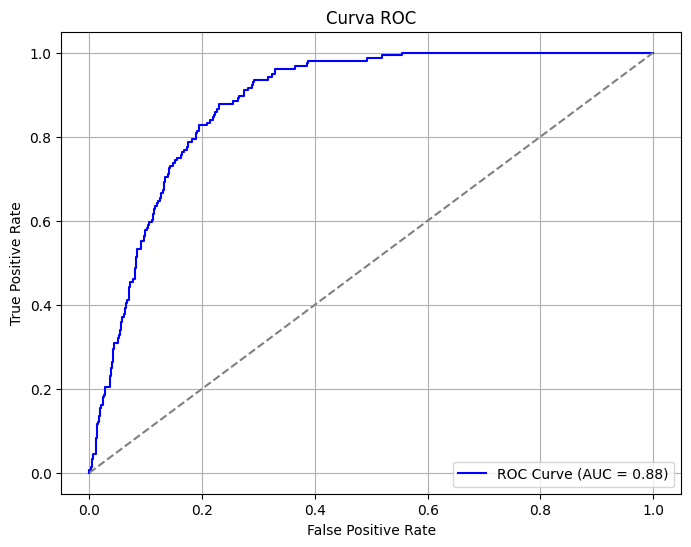

In [14]:
plot_roc_curve(modelo_xgboost, X_test, y_test)

In [17]:
"Los modelos mostraron excelente desempeño en validación cruzada, aunque también evidenciaron indicios de sobreajuste, por lo que recomendamos seguir con ajustes finos de hiperparámetros y validación más robusta en futuras etapas."

'Los modelos mostraron excelente desempeño en validación cruzada, aunque también evidenciaron indicios de sobreajuste, por lo que recomendamos seguir con ajustes finos de hiperparámetros y validación más robusta en futuras etapas.'

In [15]:
import pandas as pd

importancia = modelo_xgboost.feature_importances_
features = X_train.columns
importancia_df = pd.DataFrame({'feature': features, 'importance': importancia})
importancia_df = importancia_df.sort_values(by='importance', ascending=False)
print(importancia_df)


              feature  importance
26    contact_unknown    0.138954
4             housing    0.136470
5                loan    0.086106
24     marital_single    0.055995
23    marital_married    0.053330
8            duration    0.051506
12    job_blue-collar    0.048345
20     job_technician    0.045218
18       job_services    0.039644
15     job_management    0.036775
16        job_retired    0.033120
10              pdays    0.032733
27     poutcome_other    0.029806
21     job_unemployed    0.025813
17  job_self-employed    0.024212
13   job_entrepreneur    0.022038
14      job_housemaid    0.020460
7               month    0.017965
28   poutcome_success    0.012771
25  contact_telephone    0.012472
1           education    0.012367
3             balance    0.011065
19        job_student    0.010830
9            campaign    0.009846
6                 day    0.009556
22        job_unknown    0.008002
11           previous    0.007673
0                 age    0.006927
2             

In [16]:
DATA_PATH_COMPLETE = ROOT_DIR / "data/bank-full.csv"
df_complete = load_data(DATA_PATH_COMPLETE)

# Revisión de nulos
print("\n🚨 Nulos por columna:\n", df_complete.isnull().sum())

# Duplicados
print("\n📎 Registros duplicados:", df_complete.duplicated().sum())



🚨 Nulos por columna:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

📎 Registros duplicados: 0


In [17]:
df_complete_encoded = codificar_variables(df_complete)
#df_complete_encoded.drop(columns=['duration', 'pdays'], inplace=True)

#df_complete_encoded.drop(columns=['contact_unknown', 'duration', 'pdays', 'contact_telephone', 'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'previous'], inplace=True)

In [18]:
# Separar X / y
X = df_complete_encoded.drop("y", axis=1)
y = df_complete_encoded["y"]

In [19]:
# Evaluar en test
metricas_df_complete = evaluar_modelo(modelo_xgboost, X, y)
print(metricas_df_complete)

{'threshold': 0.2, 'accuracy': 0.8649886089668444, 'precision': 0.45044387693056065, 'recall': 0.7003214218188694, 'f1': 0.5482534043812907, 'confusion_matrix': array([[35403,  4519],
       [ 1585,  3704]]), 'auc': 0.8973510919558407}


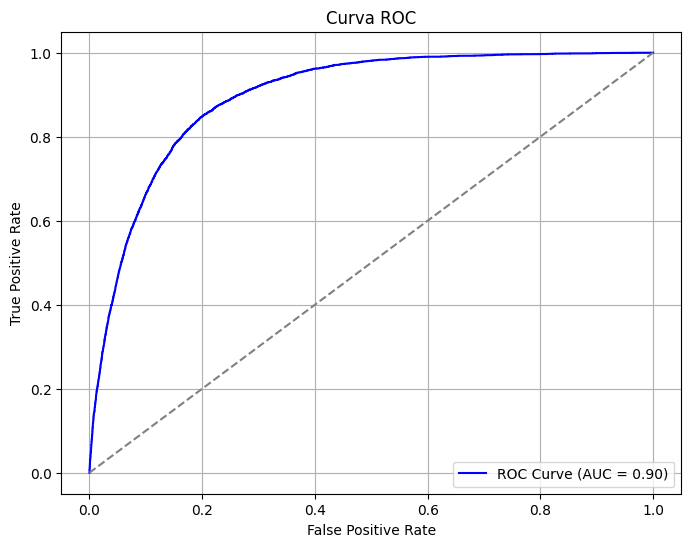

In [20]:
plot_roc_curve(modelo_xgboost, X, y)